#  College of Engineering Attingal
###  CST384 Concepts in Deep Learning
#### Instructor Dr.Sunil T T

 
# Build a simple  Neural Network in Keras

It is assumed that the participants have some exposure to python and programming.  If you are skeptical,there are some     python refresher notebooks which you can try out. 

It is assuumed that you have a working installation of anaconda. Or you can use the following link to open the code in git hub and copy to your drive.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]( https://colab.research.google.com/github/suniltt/cst384/blob/main/simple_ann/simple_net_in_keras.ipynb       )     

You will learn how to build a very simple neural network using kera libruary

Pre requsites :  python , matplotlib, tensorflow and keras

In [ ]:
# you may install keras and tensor flow if they are missing 

In [ ]:
#pip install keras 

In [ ]:
#pip install tensorflow

In [ ]:
#pip install matplotlib

What is a tensor ?
   
Tensors are multi-dimensional arrays with a uniform type

<img src="images/tf4.png" width="500"/>

Graph computation 
 

  
<img src="images/tf1.png" width="500"/>

  
<img src="images/tf2.png" width="500"/>
 

Tensor flow is an open source library which  provides graph computation capabilities. 


Keras is a high level library that uses Tensor flow to build machine learning applicaiton. 

In this  lecture series we will use keras to explore machine learning algorithms from a pratcical point of view

####  MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database ) is a large database of handwritten digits that is commonly used for training image processing and machine learning algorithms.
Ref:http://yann.lecun.com/exdb/mnist/

There are 60000 triaing images and 10000 validation images. Training images were written by employees of american census dept. The validation images were written by high school students

Some sample digits from MNIST
  
  <img src="images/mnist.png" width="400"/>



We will try to build a simple ANN using keras to classify MNIST data set. The data set has 60000 training images and 10000 testing images. Each image is 28x28 gray scale images. Each pixel value can be between 0 and 255 ( 8bit)


<img src="images/fig_3_mnist.png" width=400/>

We are going to build a simple NN  with one hidden layer using keras. The block diagram is shown below.
A neural network takes a 1 dimensional vector as input. So we convert the 2d image to a 1 d array. 

There are 784 (= 28x28) inputs for each digit. The network should  find out which digit it is. There are 10 out puts ( 0 to 9 ). The out put layer is designed to out put  a boolean ( 0 or 1 )depending on the input degit.
Eg For the  digit 7, 00000 00100 will be out put. ( This kind of encoding is called one hot encoding) 

 
<img src="images/ann.png" width=400/>

#### Load packages and modules

In [1]:
import keras                                

from keras.datasets import mnist    # Mnist data set from keras 


from keras.models import Sequential   #  Sequential model


from keras.layers import Dense        # Dense network

from tensorflow.keras.optimizers import SGD    #optimizer


from matplotlib import pyplot as plt    # This is for plotting  

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# Keras has a lot of standard datasets available, 

#That is why we imported from keras.datasets import mnist 

# data will be downloaded from internet. it may take some time

# X_train contains training data,y_train lablels
# X_valid  contains test data 

Our data has 60000 labelled training data and 10000 validation data. The labels for  validation data  is also provided so that we can cross check the results obtained from from neural network.

#### Examine your data

In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [15]:
#let us examine a few samples. 

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

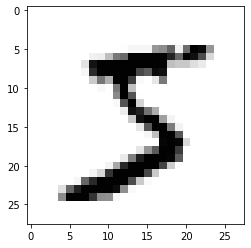

In [5]:
plt.imshow(X_train[0], cmap='Greys')

In [16]:
y_train[0]

5

In [ ]:
# let us examine the first 20 digits

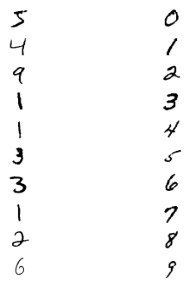

In [8]:
plt.figure(figsize=(5,5))     

for k in range(20):      # chose a range of training values 
    plt.subplot(10, 2, k+1)   # This should match with value above ( 10X2 =20)
    
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')

plt.show()

In [17]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [9]:
# examine validatin data 
X_valid.shape

(10000, 28, 28)

In [10]:
y_valid.shape

(10000,)

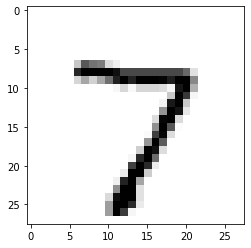

In [12]:
plt.imshow(X_valid[0], cmap='Greys')

In [13]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
y_valid[0]

7

#### Preprocess data

 We do two things here. Reshape the 28x28  digit to a single vector of 784 number.
The array elements are  between 0 and 255 . We need to normalize this to a value between
0 and 1 for that we  convert each number to float and then divide by 255. You may read this article to understand the requirement for normalizing data

https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

In [ ]:


X_train = X_train.reshape(60000, 784).astype('float32')   
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
X_valid[0]  # This is  7 the first element in X_valid represented as a single dim array

#### Encoding labels

[Explore encoding](./encoding.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]( https://colab.research.google.com/github/suniltt/cst384/blob/main/simple_ann/encoding.ipynb      )  

In [18]:
# We convert the lables to one hot representation. 

from keras import utils as np_utils

n_classes = 10

y_train =keras.utils.np_utils.to_categorical (y_train, n_classes)
y_valid= keras.utils.np_utils.to_categorical(y_valid, n_classes)
 

In [19]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
y_valid[0:5] # one hot encoded data

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

We have the data ready for training and validation.  In the next step
we will design a network  model and compile it to an actual network. Keras hides the complexity  behid this operation.  The flow chart  of building a Neural net is shown below.

 
 <img src="images/keras_model.png" width=400/>

#### Define neural network architecture

There are two ways to build Keras models: sequential and functional.

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible. Look at the following link for more information. 

https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [ ]:
model = Sequential() 


The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models.
 
 <img src="images/dense_layer.png" width=400/>


In [ ]:
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))

Let us examine above line 

There are  64 neurons in the hidden layer

Each neuron has sigmoid activation funtion 
There are 784 inputs.

 One neuron
 
 <img src="images/n1.png" width=400/>


Sigmoid activation function

 

 <img src="images/sigmoid.png" width=400/>

In [ ]:
# final layer 

model.add(Dense(10, activation='softmax'))


#Softmax layer converst outputs to probablites 


 <img src="images/softmax.jpg" width=400/>

In [ ]:
model.summary()

In [ ]:
(64*784) # Wi Xi  Total weights at input layer 

In [ ]:
(64*784)+64   # 64 biases 

In [ ]:
(10*64)+10  # final layer  Wights + bias

In [ ]:
(10*64)+10  +  (64*784)+64    

#### Compile  the network

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### Loss function  

Loss funtion is a method of evaluating how well your algorithm models your dataset. If your predictions are totally off, your loss function will output a higher number. If they’re pretty good, it’ll output a lower number. As you change pieces of your algorithm to try and improve your model, your loss function will tell you if you’re getting anywhere.



 <img src="images/loss_function.png" width=500/>

Mean Square Error/Quadratic Loss/L2 Loss
 
 <img src="images/mse.png" width=400/>

Please read about other loss functions   https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

#### Optimizer and   learning rate  

Effect of changing weights on Loss funtion
 
 <img src="images/opt1.png" width=400/>

Loss vs Weight

 <img src="images/opt2.png" width=400 />
 

Gradient Descent

 

 <img src="images/opt3.png" width=400/>

 

 <img src="images/opt4.png"  width=400/>

 

 <img src="images/opt5.png" width=400/>

Adjusting the weights
 

 <img src="images/opt6.png"  width=400/>
Here the alpha symbol is the learning rate. This will affect the speed of optimization of our neural network. 

If the learning rate is too small our net work may take a long time. IF it is too large  you may not find a good minimum. 

Watch this video to understand SGD

https://youtu.be/hMLUgM6kTp8

#### Train!

In [ ]:
history=model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1) # try increasing  epochs  to 100 

In [ ]:
# history variable above will preserve the out puts from each epoch

 Read about batch size and epoch here 
    https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

Let us choose  one row vector from X valid and test the model


In [21]:
test_case =X_valid[:1,:]

In [22]:
test_case.shape

(1, 28, 28)

In [23]:
predicted_digit=model.predict(test_case)

NameError: name 'model' is not defined

In [ ]:
predicted_digit  # This is an array with probabilities for each digit

We can use a mumpy funtion to convert it to the desired label

In [ ]:
import numpy as np
np.argmax(predicted_digit,axis=1)

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
print(history.history.keys())

In [ ]:
print(history.history.values())

In [ ]:
 for key, value in history.history.items() :
    print (key, value)

In [ ]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

The accuracy is low. Why ?

Try with more epochs .  is it a good practice ?

Increase the number of neurons in the hidden layer . Will this improve accuracy ?

Read about the following metrices for classification 
 accuracy, precision and recall 
